# KMeans Clustering And Pricipal Component Analysis

### Python Implementation

## Kmeans Clustering

In [1]:
import numpy as np #linear Algebra
from scipy.io import loadmat # loading .mat files
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns
from random import sample # Randomly pick centres
from numpy.linalg import svd # SVD
%matplotlib inline

 ### Implementing K-means

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set $\{x^{(1)},\ldots x^{(m)}\}$ (where $x^{(i)}\in \mathbb{R}^n$), and want to group the data into a few cohesive 'clusters'. The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

#### Finding closest centroids

In the 'cluster assignment' phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specically, for every example $i$ we set 
$$c^{(i)} :=j \quad\text{that minimizes}\quad\left||x^{(i)}-\mu_j\right||^2,$$

where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the $j$-th centroid

In [2]:
def findClosestCentroids(X, centroids):
    idx = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        idx[i] = np.argmin(np.sum(np.square(X[i] - centroids),axis=1))
    return idx

#### Computing centroid means

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specically, for every centroid $k$ we set
$$\mu_k := \frac{1}{|C_k|}\sum_{i\in C_k}{x^{(i)}}$$

In [3]:
def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i] = np.mean(X[idx==i], axis=0)
    return centroids

#### K-means on example dataset

In [4]:
#load the simple 2D data
data = loadmat('ex7data2.mat')
X = data['X']
X.shape

(300, 2)

In [5]:
#sample test #expected output 0 2 1
K=3
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)

print(f"Closest centroids for the first 3 examples: {idx[0:3]}")

Closest centroids for the first 3 examples: [0. 2. 1.]


In [6]:
'''      expected
     [2.42830111 3.15792418]
     [5.81350331 2.63365645]
     [7.11938687 3.6166844 ]'''

centroids = computeCentroids(X, idx, K)
print(f"Centroids computed after initial finding of closest centroids:\n {centroids}")

Centroids computed after initial finding of closest centroids:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [7]:
def runKMeans(X, centroids, max_iters):
    K = centroids.shape[0]
    for _ in range(max_iters):
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K)
    return idx, centroids

#### Visualize the data

In [8]:
def plotData(X, centroids):
    plt.figure(figsize=(7,7))
    plt.plot(X[:,0],X[:,1],'bo',color='blue',label='Unclustered Data',alpha=0.75)
    plt.plot(centroids[:,0],centroids[:,1], 'x', color='red', markersize=8)
    plt.grid()
    plt.legend()
    plt.show()

In [9]:
def plotKMeans(X,centroids,idx,K,num_iters):
    m,n = X.shape
    
    centroid_motion = []
    #run Kmeans each time plotting the results
    for i in range(num_iters):
        colors = ['red','green','blue']
        #plot every cluster with a different color
        plt.figure(figsize=(7,7))
        for k in range(K):
            plt.scatter(X[idx==k ,0],X[idx==k,1],c=colors[k],marker='o',alpha=0.75)
            
        plt.title(f"Iteration {i+1}", fontsize=13)
        
        #get new centroids
        centroids = computeCentroids(X,idx,K)
        
        #assign each point to its closest centroid
        idx = findClosestCentroids(X, centroids)
        
        #plotting centroid motion
        centroid_motion.append(centroids)
        x,y = [],[]
        for centroid in centroid_motion:
            x.append(centroid[:,0])
            y.append(centroid[:,1])
        for _ in range(len(x[0])):
            plt.plot(x,y,'rx--',markersize=8,color='black')
        plt.grid()
        plt.show()

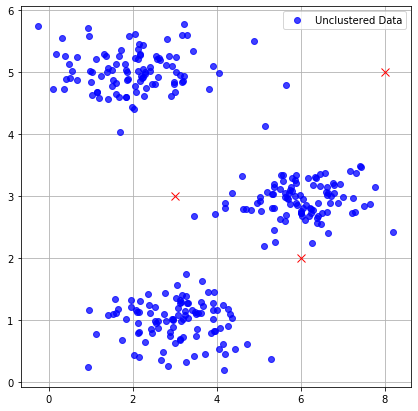

In [10]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
plotData(X, initial_centroids)

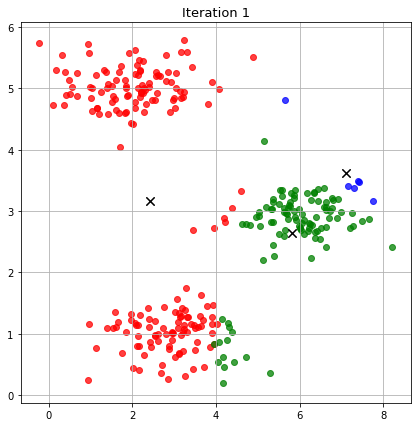

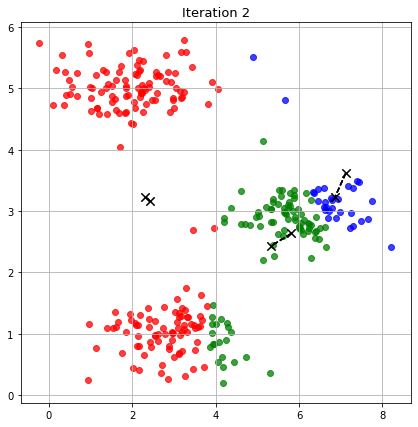

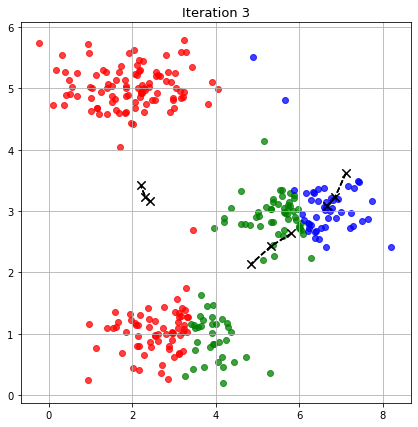

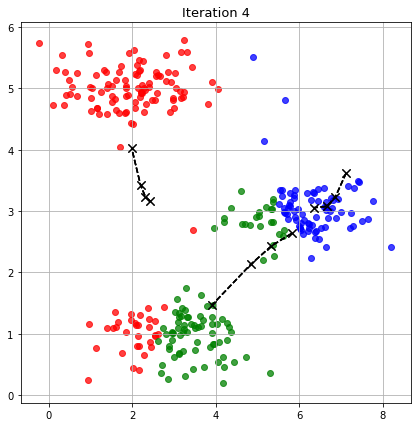

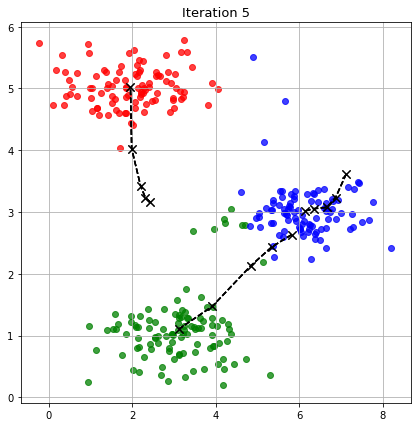

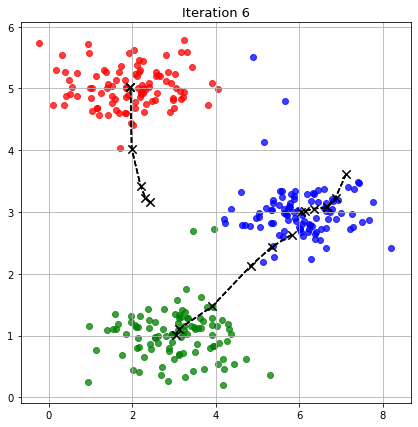

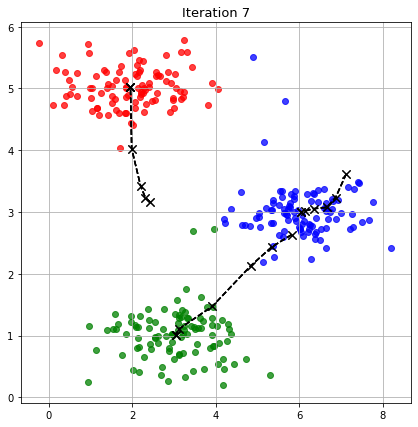

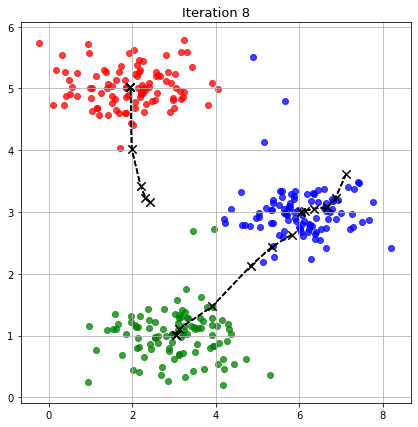

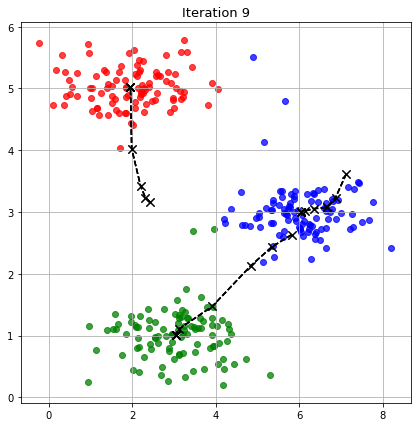

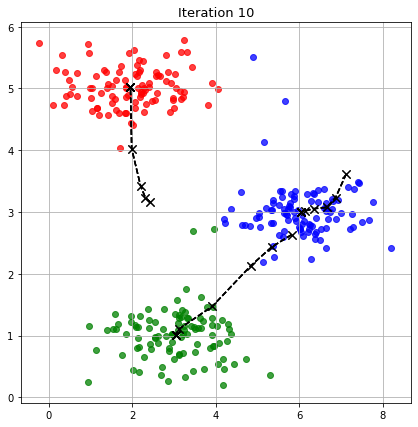

In [11]:
plotKMeans(X,initial_centroids,idx,K,num_iters=10)

#### Random initialization

In practice, a good strategy for initializing the centroids is to select random examples from the training set

In [12]:
def kMeansInitCentroids(X,K):
    randindx = sample(range(0,X.shape[0]),K)
    return X[randindx]

In [13]:
# sample of 4 randomly chosen centroids
sample_centroids = kMeansInitCentroids(X,4)
print(*sample_centroids)

[2.02134502 4.41267445] [3.45928006 2.68478445] [2.54371489 0.95732716] [2.87961084 0.75413741]


### Image compression with K-means

In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors. By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities). 

In [14]:
from imageio import imread#load the image

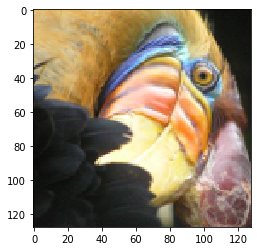

In [15]:
# Load an image of a bird
A = imread('bird_small.png')
plt.imshow(A)

In [16]:
print(A.shape)

(128, 128, 3)


In [17]:
# Divide by 255 so that all values are in the range 0 - 1
A = A/255

#Size of the image
img_size = A.shape

In [18]:
#Reshape the image into an Nx3 matrix where N = number of pixels. 
#Each row will contain the Red, Green and Blue pixel values. 
#This gives us our dataset matrix X that we will use K-Means on.

X = np.reshape(A,(img_size[0]*img_size[1],3))

In [19]:
#Run K-Means algorithm on this data.
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X,K)
idx, centroids = runKMeans(X,initial_centroids,max_iters)

After finding the top $K = 16$ colors to represent the image, you can now assign each pixel position to its closest centroid using the findClosestCentroids function. This allows you to represent the original image using the centroid assignments of each pixel. Notice that you have signicantly reduced the number of bits that are required to describe the image. The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128\times128\times24 = 393,216$ bits. 

The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits used is therefore $16\times24 + 128\times128\times4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6. 

In [20]:
# Find closest cluster members
idx = findClosestCentroids(X, centroids)

Essentially, now we have represented the image X as in terms of the indices in idx. We can now recover the image from the indices (idx) by mapping each pixel (specified by it's index in idx) to the centroid value.

In [21]:
X_recovered = centroids[idx.astype(int)]

#Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_size[0],img_size[1],3))

<Figure size 432x432 with 0 Axes>

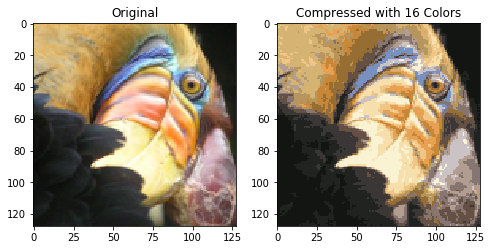

In [22]:
# Display original and compressed image side by side
plt.figure(figsize=(6,6))
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(8,8))
ax[0].imshow(A)
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with 16 Colors')
plt.show()

##  Principal Component Analysis

#### Example dataset 

In [23]:
#a simple 2D dataset which has one direction of large variation and one of smaller variation. 
data = loadmat('ex7data1.mat')
X = data['X']
X.shape

(50, 2)

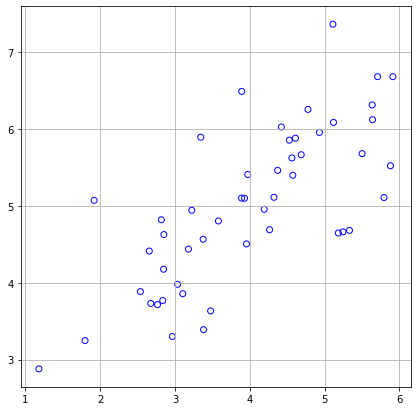

In [24]:
#visualize the data
plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],facecolors='none',edgecolors='b')
plt.grid()
plt.show()

### Implementing PCA

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range

PCA consists of two computational steps: 

    1.First, compute the covariance matrix of the data. 
$$ \Sigma =  \frac{1}{m} X^{T} X$$

    2.Then, using a Single Value Decomposition(svd) function compute the eigenvectors. These will correspond to the principal components of variation in the data. 

In [25]:
def featureNormalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X, ddof=1,axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu,sigma

In [26]:
def pca(X):
    m = X.shape[0]
    Sigma = (1/m)* X.T.dot(X)
    U,S,V = svd(Sigma)
    return U,S

In [27]:
#Before running PCA, it is important to first normalize 
X_norm, mu, sigma = featureNormalize(X)

# Run PCA
U,S = pca(X_norm)

#expected first eigenvectors  [-0.707 -0.707]

print(U[:,0])

[-0.70710678 -0.70710678]


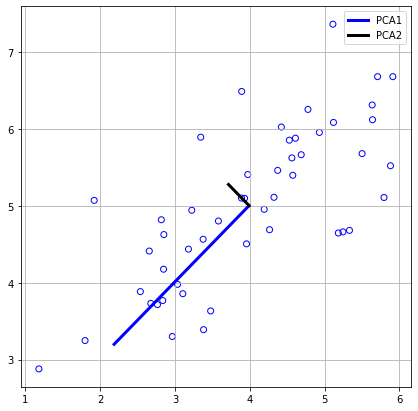

In [28]:
# Draw the eigenvectors centered at mean of data. These lines show the directions of maximum variations in the dataset

plt.figure(figsize=(7,7))
plt.scatter(X[:,0],X[:,1],facecolors='none',edgecolors='b')
plt.plot([mu[0], mu[0] + 1.5 * S[0] * U[0, 0]],
         [mu[1], mu[1] + 1.5 * S[0] * U[1, 0]],
         color='blue',linewidth=3,
         label='PCA1')
plt.plot([mu[0], mu[0] + 1.5*S[1]*U[1,0]], 
         [mu[1], mu[1] + 1.5*S[1]*U[1,1]],
        color='black',linewidth=3,
        label='PCA2')
plt.legend()
plt.grid()
plt.show()

### Dimensionality reduction with PCA

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)}\rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D)

In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

####  Projecting the data onto the principal components

In [29]:
#choose K principal components(eigenvectors) and project the data on to these

def projectData(X_norm,U,K):
    return X_norm.dot(U[:,:K])

In [30]:
# project the first example onto the first dimension i.e PCA 1
# expected first value 1.481 
K = 1
z = projectData(X_norm, U, K)
print(z[0])

[1.48127391]


####  Reconstructing an approximation of the data

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. This can be inferred by:

$Z  \in \mathbb{R}^{n \times k}$

$ U_{reduced}   \in \mathbb{R}^{n \times k}$

$X   \in \mathbb{R}^{n \times n}$

$\therefore$   $Z * U_{reduced}^{T}  \implies X_{approx}$

In [31]:
def recoverData(Z,U,K):
    return Z.dot(U[:,:K].T)

In [32]:
# expected value  [-1.047 -1.047]
X_rec = recoverData(z,U,K)
print(X_rec[0])

[-1.04741883 -1.04741883]


#### Visualizing the projections

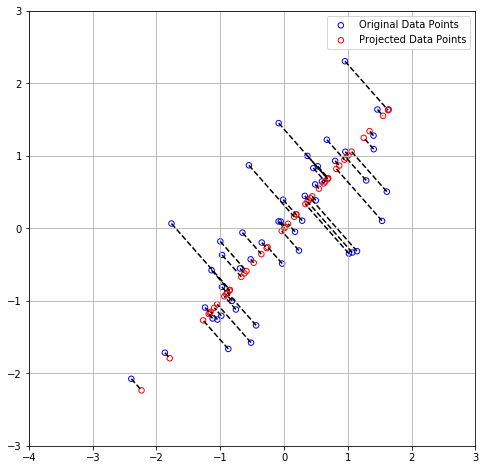

In [33]:
plt.figure(figsize=(8,8))
#Plot the normalized dataset (returned from pca)
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')

#plot the reduced data points
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='Projected Data Points')

#Draw lines connecting the projected points to the original points
for k in range(X_norm.shape[0]):
    x,y = [X_norm[k,0],X_rec[k,0]],[X_norm[k,1],X_rec[k,1]]
    plt.plot(x,y,'k--')
plt.grid(True)
plt.xlim((-4,3))
plt.ylim((-3,3))
plt.legend()
plt.show()

The projection effectively only retains the information in the direction given by $U_{1}$

### Face image dataset

The dataset ex7faces.mat contains a dataset* X of face images, each  in grayscale. Each row of X corresponds to one face image (a row vector of length 1024

In [34]:
#load data
data = loadmat('ex7faces.mat')
X = data['X']
print(X.shape)

(5000, 1024)


In [35]:
def displayData(X, n):
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i + 1)
        plt.imshow(X[i].reshape((32, 32)).T,
               cmap=plt.cm.gray, interpolation='nearest')
        plt.xticks([])
        plt.yticks([])
    plt.show()

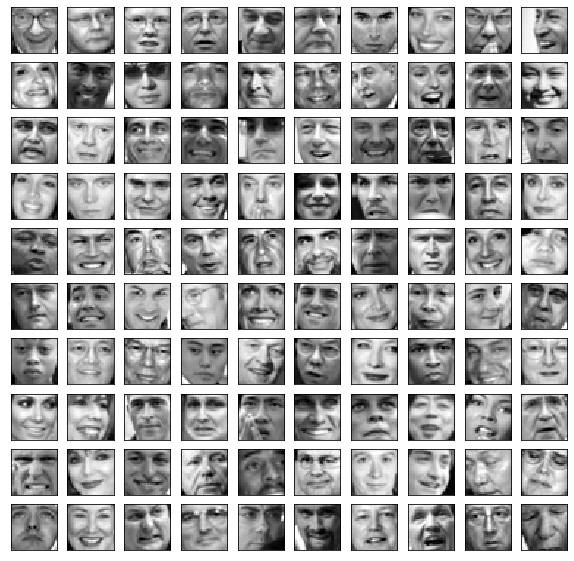

In [36]:
#display the first 100 samples
displayData(X,10)

#### Run PCA on faces

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix X.After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in U (each row) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset.

In [37]:
X_norm, mu, sigma = featureNormalize(X)

#run pca
U,_ = pca(X_norm)

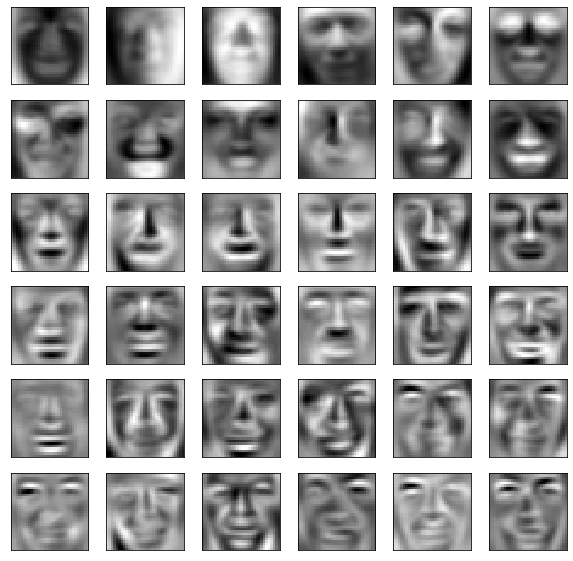

In [38]:
#Visualize the top 36 eigenvectors found
displayData(U.T[:36],6)

The code below will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector . $z^{(i)}\in\mathbb{R}^{100}$

In [39]:
K = 100
Z = projectData(X_norm, U, K)

To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset

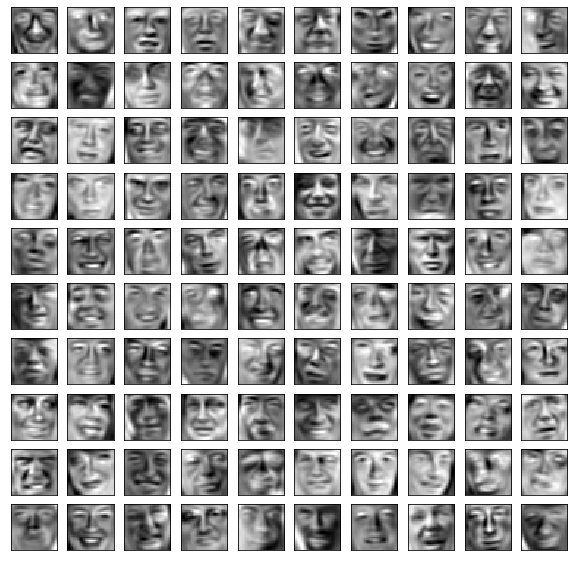

In [40]:
X_rec = recoverData(Z,U,K)

# Display reconstructed data from only k eigenfaces

displayData(X_rec,10)

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than $10 \times$) in the dataset size that can help speed up your learning algorithm signicantly. For example, if you were training a neural network to perform person recognition (gven a face image, predict the identitfy of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

### PCA for visualization

In [41]:
#Here we visulaize the 16 clusters obtained from compressing the image using PCA
# The original Data is in 3D and as such it would be cumbersome to visualize
# Therefore the goal is to use pca to project the data into a 2D subspace and then visualize the projection

img_data = np.reshape(A,(img_size[0]*img_size[1],3))

In [42]:
#normalize the data

X_norm,mu,sigma = featureNormalize(img_data)

#run pca to get eigenvectors
K = 2
U,_ = pca(X_norm) 

In [43]:
# project the data to the top 2 eigenvectors

K = 2
z = projectData(X_norm,U,K)

In [44]:
#Just increment the idx labels by one to deal with the zero based indexing 
idx = idx+1

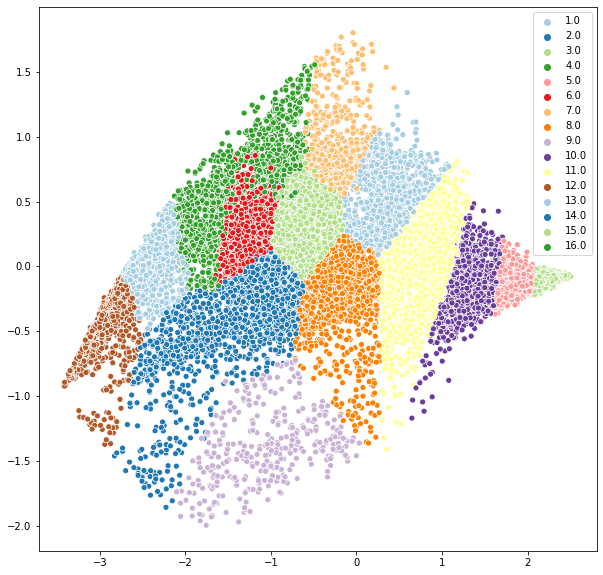

In [45]:
# plot the 2D graph showing the clusters
plt.figure(figsize=(10,10))
sns.scatterplot(z[:,0],z[:,1], hue=idx, palette = sns.color_palette("Paired", 16))
plt.show()

Following pca we can visualize the 16 clusters that were found by KMeans.